In [1]:
import numpy as np
from matplotlib import pyplot as plt

# compute cosmology with class

In [2]:
#import and define cosmlogy in class
from classy import Class

#Start by specifying the cosmology  - planck best fit
h = 0.6766
Omega_b = 0.02242/h**2
Omega_cdm = 0.11933/h**2
Omega_m = Omega_cdm+Omega_b
A_s = 2.105e-9 
n_s = 0.9665

#Create a params dictionary
#Need to specify the max wavenumber
k_max = 100 #UNITS: 1/Mpc # is also set to 10 later
params = {'output':'mPk,mTk',
             'non linear':'halofit',
             'Omega_b':Omega_b,
             'Omega_cdm':Omega_cdm,#Omega_m-Omega_b,#
             'h':h,
             'n_s':n_s,
             'A_s':A_s,#'n_s':n_s,'sigma8':0.828,#
             'P_k_max_1/Mpc':k_max,
             'z_max_pk':10. #Default value is 10
}

#Initialize the cosmology and compute everything
cosmo = Class()
cosmo.set(params)
cosmo.compute()

# So we need to also define survey specific parameters like biases

In [3]:
import cosmo_wap as cw
import cosmo_wap.pk as pk

## Import expression for each contributions

In [4]:
survey_params = cw.survey_params.SurveyParams(cosmo)
print(survey_params.Euclid.__dict__.keys())

dict_keys(['b_1', 'z_range', 'be_survey', 'Q_survey', 'n_g', 'f_sky'])


### CosmologicalFunctions takes in the cosmology and a survey_params dict

In [5]:
#so now we can compute terms for this cosmology and for euclid-likes biases
cosmo_funcs = cw.ClassWAP(cosmo,[survey_params.Euclid],compute_bias=True)

Computing bias params...


### functions have this format
- xxx.lx(params,cosmo_functions,zz,t=0)


### now all parameters we need are computable from cosmo_functions - lets look at an example plots

In [6]:
zz=1 # redshift
kk = np.linspace(0.01,0.1)

NameError: name 'pk' is not defined

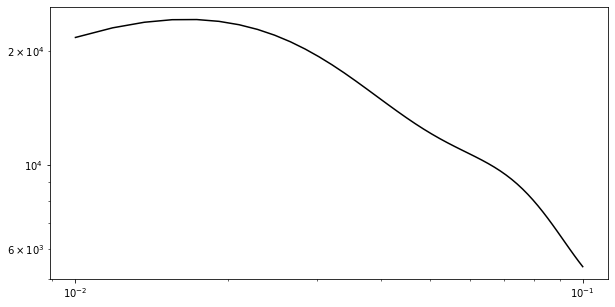

In [9]:
#for monopole 

plt.figure(figsize=(10,5))

#set LOS to t=1/2 - this is the natural choice for your theory for the monopole
t=1/2

#regular newtonian expression
plt.loglog(kk,np.abs(pk.Pk0.l0(cosmo_funcs,kk,zz=zz,t=0).real),'k',label='Newtonian')

#these corrections to the monopole scale as k^-2
plt.loglog(kk,np.abs(pk.Pk0.l0(cosmo_funcs,kk,zz=zz,t=0).real+pk.allWSGR.l0(cosmo_funcs,kk,zz,t)).real,'--',color='red',label='Newtonian+WS+GR')
plt.legend()


Text(0, 0.5, '$ P_0(k) $')

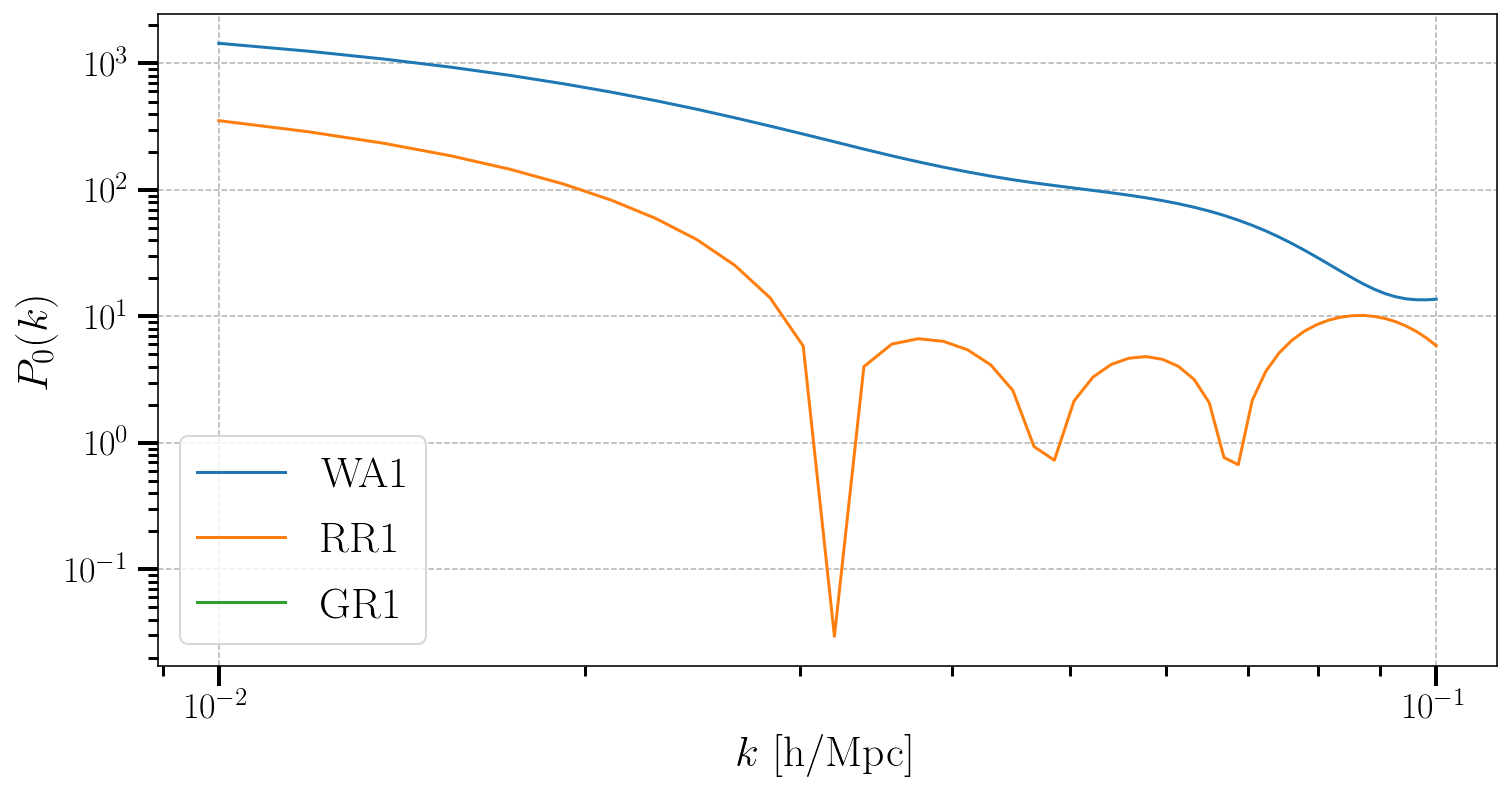

In [83]:
# for dipole
plt.figure(figsize=(12,6))

plt.plot(kk,np.abs(WA1.l1(params,cosmo_functions,zz,t=0).imag),label='WA1')
plt.plot(kk,np.abs(RR1.l1(params,cosmo_functions,zz,t=0).imag),label='RR1')
plt.plot(kk,np.abs(GR1.l1(params,cosmo_functions,zz,t=0).imag),label='GR1')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$k $ [h/Mpc]')
plt.ylabel(r'$ P_0(k) $')

## Or we can consider the multi-tracer case 

In [86]:
#we now assing different survey parameters to survey_params1
cosmo_functions = CosmologicalFunctions(cosmo,survey_params=Euclid_dict,survey_params1=SKAO2_dict)

Text(0, 0.5, '$ P_0(k) $')

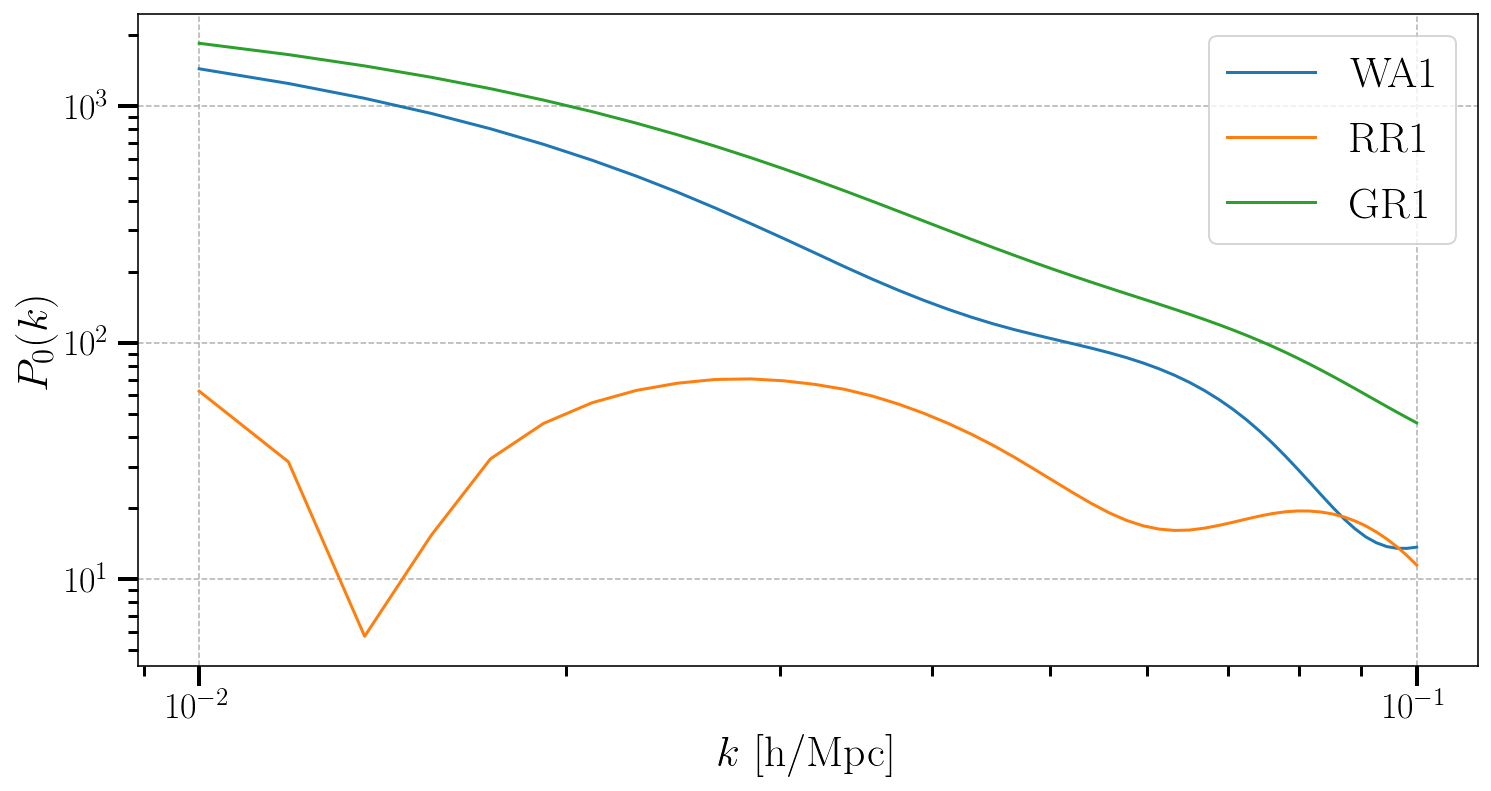

In [87]:
# for dipole - now the GR part does not cancel
plt.figure(figsize=(12,6))

plt.plot(kk,np.abs(WA1.l1(params,cosmo_functions,zz,t=0).imag),label='WA1')
plt.plot(kk,np.abs(RR1.l1(params,cosmo_functions,zz,t=0).imag),label='RR1')
plt.plot(kk,np.abs(GR1.l1(params,cosmo_functions,zz,t=0).imag),label='GR1')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$k $ [h/Mpc]')
plt.ylabel(r'$ P_0(k) $')

In [88]:
#creating composite functions is also useful
class WA_RR:#for all wide separation
    def l0(params,derivs,r,s):
        return WA2.l0(params,r,s)+WARR.l0(params,derivs,r,s)+RR2.l0(params,derivs,r,s)
    
    def l1(params,derivs,r,s):
        return WA1.l1(params,r,s) + RR1.l1(params,derivs,r,s)
    
    def l2(params,derivs,r,s):
        return WA2.l2(params,r,s)+WARR.l2(params,derivs,r,s)+RR2.l2(params,derivs,r,s)
    
class WA_RR_GR:
    def l0(params,derivs,betas,r,s):
        return WA2.l0(params,r,s) +RR2.l0(params,derivs,r,s)+GR2.l0(params,betas)+WAGR.l0(params,betas,r,s)+WARR.l0(params,derivs,r,s)+RRGR.l0(params,derivs,betas,r,s)
    
    def l1(params,derivs,betas,r,s):
        return WA1.l1(params,r,s) +RR1.l1(params,derivs,r,s)+GR1.l1(params,betas)
    
    def l2(params,derivs,betas,r,s):
        return WA2.l2(params,r,s) +RR2.l2(params,derivs,r,s)+GR2.l2(params,betas)+WAGR.l2(params,betas,r,s)+WARR.l2(params,derivs,r,s)+RRGR.l2(params,derivs,betas,r,s)
